In [40]:
import gizmo_analysis as gizmo
import utilities as ut

import pynbody

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

import pandas as pd
import numpy as np 

import glob

In [2]:
datapath = '/home/jmwick/H1-merian/fire/csvs'

In [3]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

In [57]:
currentGals = glob.glob(datapath+'/*.txt')
currentGals.sort()
currentGals

['/home/jmwick/H1-merian/fire/csvs/m11b_r2100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11d_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11e_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11h_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11i_r7100.txt',
 '/home/jmwick/H1-merian/fire/csvs/m11q_r880.txt']

In [5]:
pd.read_csv(currentGals[0]).head()

,galaxyID,tstep,t,tlookback,z,M_star,R_halfmass,sigma_star,sigma_youngstar,SFR_10,SFR_100,sSFR_10,sSFR_100
0,m11b_r2100,600,13.798747,0.000000,0.000000,54881784.0,39.19,51.041153,NaN,0.0,60121.652,0,-10.960397
1,m11b_r2100,599,13.796529,0.002218,0.000159,54882590.0,39.19,51.051075,NaN,0.0,62027.810,0,-10.946848
2,m11b_r2100,598,13.794310,0.004437,0.000319,54883050.0,39.20,51.063260,NaN,0.0,62032.840,0,-10.946817
3,m11b_r2100,597,13.792093,0.006654,0.000478,54883784.0,39.20,51.078175,NaN,0.0,62037.043,0,-10.946793
4,m11b_r2100,596,13.789874,0.008872,0.000637,54884668.0,39.20,51.099730,NaN,0.0,62037.043,0,-10.946800


## 3 Panel + size/ssfr scatter

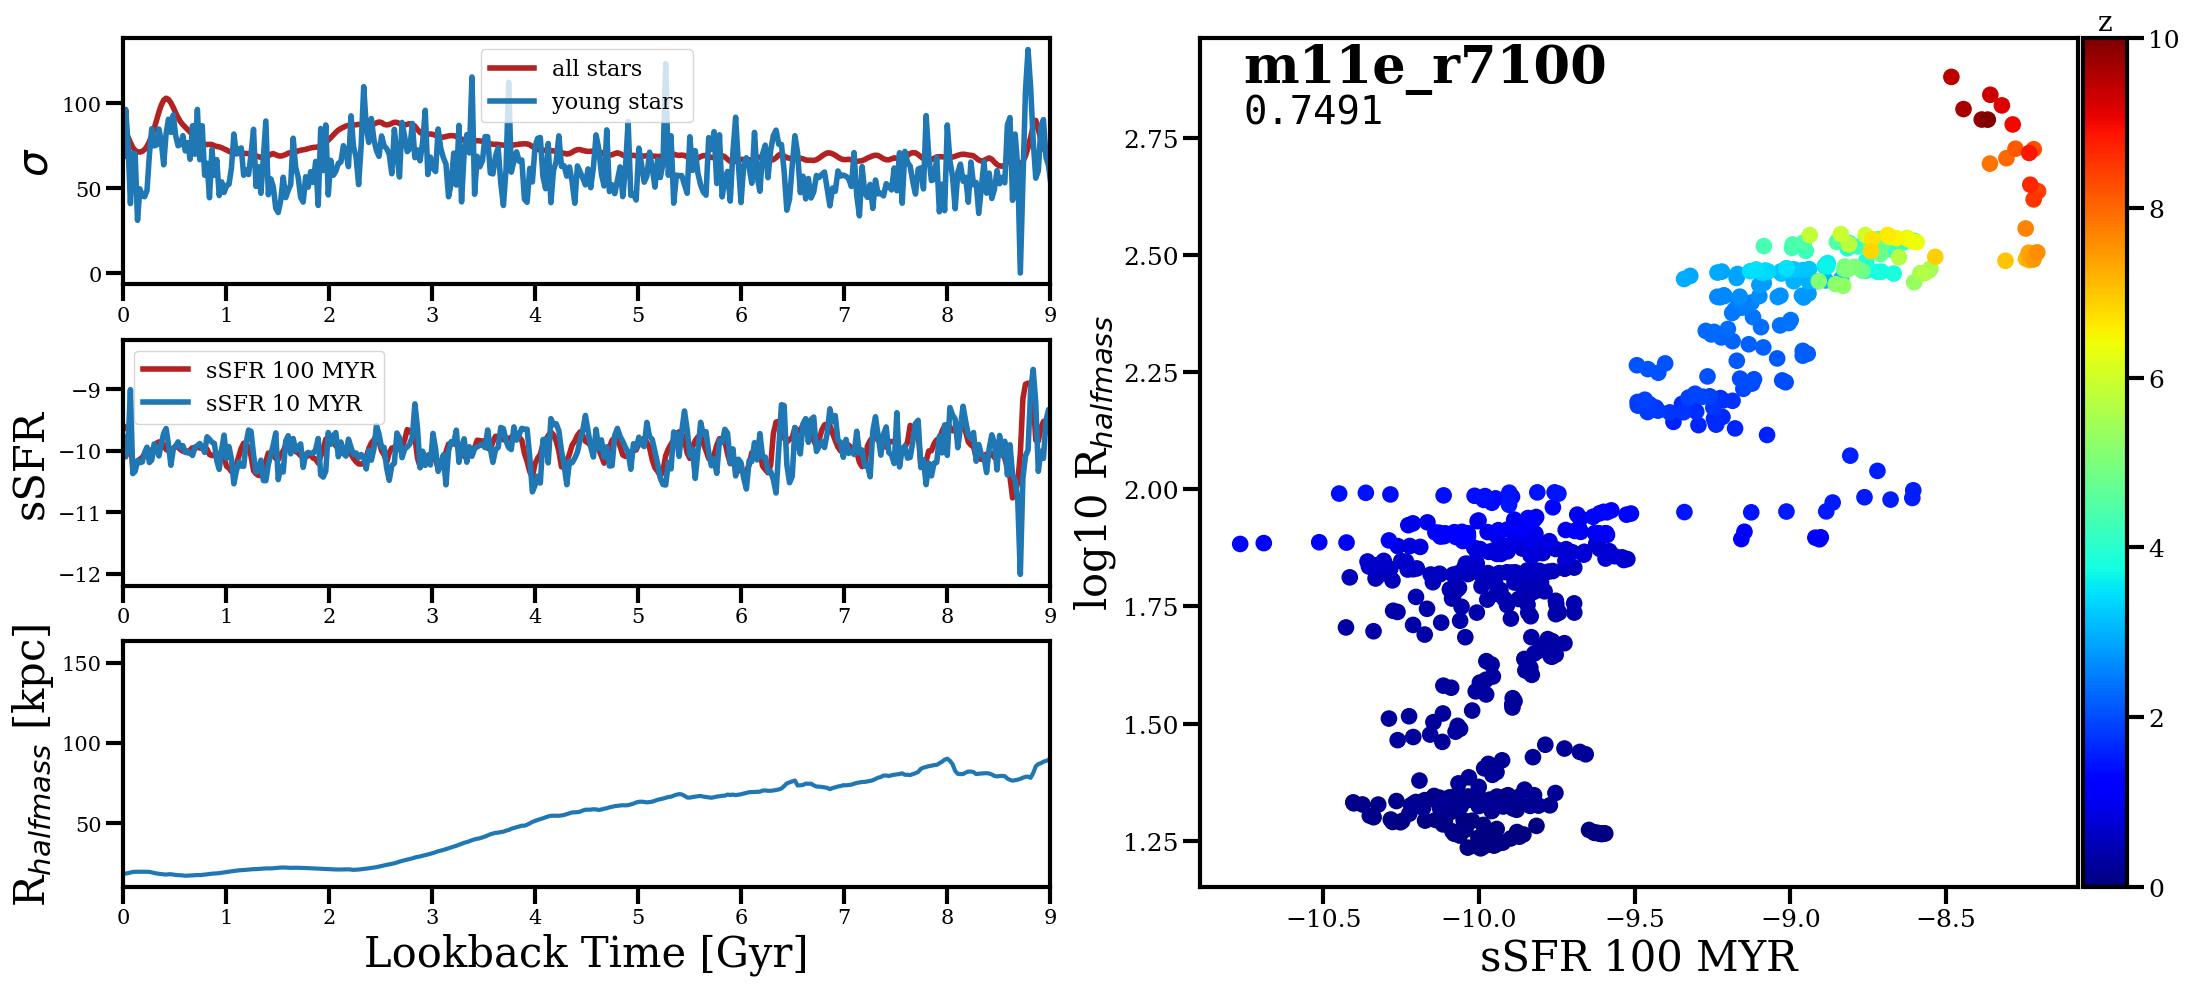

In [61]:
gal = currentGals[2]
zmax = 10
ymin = -1

tlim = 9

data = pd.read_csv(gal)
tlookback = data['tlookback']
mask = tlookback<tlim

# set up fig
fig = plt.figure(facecolor='w', figsize=(22,10))

ax3 = fig.add_subplot(3,2,5)
ax2 = fig.add_subplot(3,2,3, sharex=ax3)
ax1 = fig.add_subplot(3,2,1, sharex=ax3)

axscatter = fig.add_subplot(1,2,2)

ax1.tick_params(axis='y', which='major', labelsize=18)
ax2.tick_params(axis='y', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.tick_params(axis='x', which='major', labelsize=0)    
ax2.tick_params(axis='x', which='major', labelsize=0)

axscatter.tick_params(axis='both', which='major', labelsize=18)

## Line plots 
# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigYoungStar = data['sigma_youngstar'][tlookback<tlim+1]

ax1.plot(tlookback[tlookback<tlim+1], sigStar, linewidth=4, color='firebrick')
ax1.plot(tlookback[tlookback<tlim+1], sigYoungStar, linewidth=4, color='tab:blue')

ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_ylabel(r'$\sigma$', fontsize=30)

ax1.legend(['all stars', 'young stars'], fontsize=16)

ax1.set_xlim([0,tlim])
#ax1.set_ylim([0,80])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]
ssfr100= data['sSFR_100'][tlookback<tlim+1]

ax2.plot(tlookback[tlookback<tlim+1], ssfr100, color='firebrick', linewidth=4)
ax2.plot(tlookback[tlookback<tlim+1], ssfr10, color='tab:blue', linewidth=4)

ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel('sSFR', fontsize=30)

ax2.legend(['sSFR 100 MYR', 'sSFR 10 MYR'], fontsize=16)

#ax2.set_ylim(top=-9)

# Bottom panel: half-light radius
Rhl = data['R_halfmass'][tlookback<tlim+1]

ax3.plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

#axs[2].set_ylim([0,5])
ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.set_ylabel(r'R$_{halfmass}$ [kpc]', fontsize=30)

ax3.set_xlabel('Lookback Time [Gyr]', fontsize=30)

## scatter
x = data['sSFR_100'][data['z'] <= zmax]
y = np.log10(data['R_halfmass'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

sc = axscatter.scatter(x, y, c=c, cmap='jet', s=120)

axscatter.set_xlabel('sSFR 100 MYR', fontsize=30)
axscatter.set_ylabel(r'log10 R$_{halfmass}$', fontsize=30)

axscatter.text(s=str(gal[-14:-4]), x=min(x[x>-20]+0.01), y=max(y)-0.01, fontsize=38, weight='bold')
axscatter.text(s=str(rs)[:6], x=min(x[x>-20]+0.01), y=max(y)-0.1, fontsize=28, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

divider = make_axes_locatable(axscatter)
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

#plt.savefig('../fire/figures/breathingScatterLines/'+str(gal[-14:-4])+'.png')

## Coring over Time Profile
Basically figure 3 of Governato et al. 2012

In [46]:
gal

'/home/jmwick/H1-merian/fire/csvs/m11d_r7100.txt'

In [65]:
sgiz['mass']

SimArray([7138.2803, 7126.9883, 7129.6226, ..., 5642.823 , 5490.3506,
          5317.901 ], dtype=float32, 'Msol')

In [66]:
sgiz['pos']

SimArray([[10551315.62345359, 10565226.34658616, 10377617.63657127],
          [10551166.20838068, 10565233.29657268, 10377681.04204151],
          [10551222.76030514, 10565216.89894325, 10377720.34215308],
          ...,
          [10838571.70999904, 10491158.11331883, 10495222.64829432],
          [10838575.92833578, 10491149.33787432, 10495281.24076821],
          [10838594.63680099, 10491169.94792292, 10495204.18357871]], 'kpc')

In [83]:
np.median(sgiz['rho'][:,0])

SimArray(23307958.73210607, 'kpc')

In [92]:
pynbody.analysis.halo.center(sgiz)

ValueError: Insufficient particles around center to get velocity

In [84]:
sgiz.all_keys()

['u',
 'p',
 'HII',
 'HeIII',
 'ne',
 'rho_ne',
 'dm',
 'cosmodm',
 'redshift',
 'doppler_redshift',
 'em',
 'halpha',
 'c_n_sq',
 'hetot',
 'hydrogen',
 'HI',
 'HIeos',
 'HID12',
 'HeI',
 'HeII',
 'OI',
 'OII',
 'OVI',
 'CIV',
 'NV',
 'SIV',
 'MGII',
 'feh',
 'sixh',
 'sxh',
 'mgxh',
 'oxh',
 'nexh',
 'cxh',
 'caxh',
 'nxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',


/home/jmwick/anaconda3/envs/breathingModes/lib/python3.11/site-packages/pynbody/snapshot/gadgethdf.py:530: RuntimeWarning: No unit information found in GadgetHDF file. Using gadget default units.
  warnings.warn("No unit information found in GadgetHDF file. Using gadget default units.", RuntimeWarning)
/tmp/ipykernel_26466/3755321848.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.plot(pdDM['rbins'], np.log10(pdDM['density']))


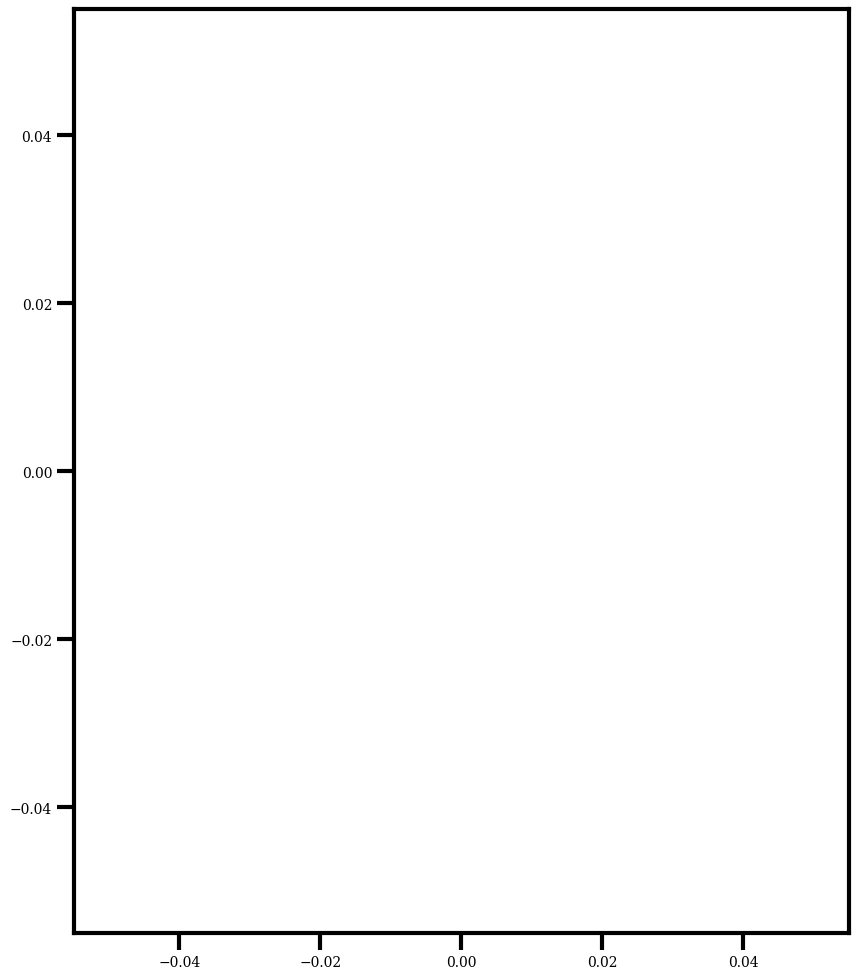

In [95]:
gal = currentGals[1]

zees = [0,1,2,3]
snapshots = [600, 534, 172, 120]
simdir = '/data/groups/leauthaud/yluo42/FIRE/'

pmin = '0.01 kpc'
pmax = '2.0 kpc'

fig = plt.figure(facecolor='w', figsize=(10,12))

for snap in snapshots:
    sgiz = pynbody.load(simdir+gal[-14:-4]+'/output/snapshot_'+str(snap)+'.hdf5')
    sgiz.physical_units()
    
    # center manually bc no halo catalog
    comx = sum(sgiz['pos'][:,0]*sgiz['mass'])/sum(sgiz['mass'])
    comy = sum(sgiz['pos'][:,1]*sgiz['mass'])/sum(sgiz['mass'])
    comz = sum(sgiz['pos'][:,0]*sgiz['mass'])/sum(sgiz['mass'])
    sgiz['pos'] -= [comx, comy, comz]

    #pynbody.analysis.angmom.faceon(sgiz)
    
    # profile dark matter density
    pdDM = pynbody.analysis.profile.Profile(sgiz.d, rmin=pmin, rmax=pmax, type='lin')
    
    plt.plot(pdDM['rbins'], np.log10(pdDM['density']))